<a href="https://colab.research.google.com/github/peter-callahan/vanderbilt/blob/main/week4_class_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 5262-51 Week 4 [ZHANG]
## Exploring the ROC curve and finding the optimal threshold

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [2]:
# Generate a random n-class classification problem.
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
df = pd.DataFrame(X)

In [3]:
df.columns = ['feature' + str(i) for i in df.columns]
df['actual_y'] = y

In [4]:
df

,feature0,feature1,actual_y
0,-1.413790,-1.094340,0
1,-1.178511,-1.582516,0
2,-1.975070,-1.853493,0
3,-1.100164,-0.942500,0
4,-1.312017,-0.665531,0
...,...,...,...
9995,-1.448187,-1.156637,0
9996,-0.724846,-0.572505,0
9997,-0.601107,-0.243071,0
9998,-1.074641,-1.019540,0


In [5]:
# train test split
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model on training set
model = LogisticRegression()
model.fit(trainX, trainy)

# predict probabilities
y_pred = model.predict_proba(testX)

In [6]:
y_pred

array([[9.92758703e-01, 7.24129721e-03],
       [9.96495510e-01, 3.50448974e-03],
       [9.99867566e-01, 1.32433775e-04],
       ...,
       [9.98780592e-01, 1.21940764e-03],
       [9.99705540e-01, 2.94459735e-04],
       [9.99603387e-01, 3.96613003e-04]])

Best Threshold=0.016153, Net Gain=0.867


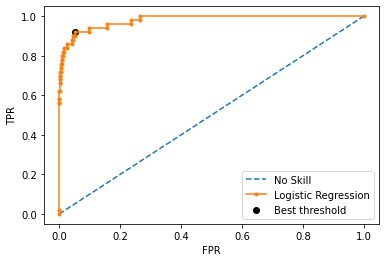

In [ ]:
# keep probabilities for the positive outcome (class 1) only
# classes are ordered so class 1 is at col index 1
y_pred = y_pred[:, 1]

# get roc curve
fpr, tpr, thresholds = roc_curve(testy, y_pred)

# calculate (benefit - cost) for each threshold
net_gain = tpr - fpr

# locate the index of the largest net_gain
ix = np.argmax(net_gain)
print('Best Threshold=%f, Net Gain=%.3f' % (thresholds[ix], net_gain[ix]))

# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best threshold')

# axis labels
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.legend()

pyplot.show()

# lr.fit(df.iloc[:, :5], df['actual_y'])

In [ ]:
cm = pd.DataFrame()
cm['tpr'] = tpr
cm['fpr'] = fpr
cm['thresholds'] = thresholds
cm['tpr-fpr'] = tpr - fpr
cm['value'] = cm['tpr'] * 10 - cm['fpr'] * 100
cm.sort_values('value', ascending=False).iloc[0, 2]

0.06039145966692482